In [1]:
path ='/content/drive/MyDrive/Colab Notebooks/video_data_clean.xlsx'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_excel(path)

In [4]:
df.head()

,id,defaultAudioLanguage,title,publishedAt,tags,tagsCount,commentCount,likeCount,viewCount,definition,duration,YearMonth,Year,reaction
0,xsPlB4WAmRc,en,timbersports training is wild 🪚 🪓,2022-02-09 17:15:40,None,1,16,1345,46110,hd,PT22S,2022,2022,1361
1,q-r6V_PgtcY,en,Huge Mountain Sends On Snowmobiles & Skis | Re...,2022-02-07 15:00:36,"['red bull', 'redbull', 'action sports', 'extr...",63,85,1935,60964,hd,PT6M56S,2022,2022,2020
2,jxe870HmYBE,en,Max Verstappen’s Icy Pre-Season Fun: Driving A...,2022-02-03 13:29:23,"['red bull', 'redbull', 'action sports', 'extr...",80,1071,26752,742990,hd,PT2M6S,2022,2022,27823
3,yxVOownOSRs,en,which runner are you? 🏃‍♀️,2022-02-01 17:09:05,None,1,62,1539,52319,hd,PT25S,2022,2022,1601
4,3-yglCSCPng,en,incredible skiing skills that just look ✨ casu...,2022-01-14 13:00:01,None,1,46,5895,238147,hd,PT22S,2022,2022,5941


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723 entries, 0 to 5722
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    5723 non-null   object        
 1   defaultAudioLanguage  5723 non-null   object        
 2   title                 5723 non-null   object        
 3   publishedAt           5723 non-null   datetime64[ns]
 4   tags                  5723 non-null   object        
 5   tagsCount             5723 non-null   int64         
 6   commentCount          5723 non-null   int64         
 7   likeCount             5723 non-null   int64         
 8   viewCount             5723 non-null   int64         
 9   definition            5723 non-null   object        
 10  duration              5723 non-null   object        
 11  YearMonth             5723 non-null   int64         
 12  Year                  5723 non-null   int64         
 13  reaction          

In [6]:
df['title']= pd.Series(df['title'], dtype="string")
df['tags'] = pd.Series(df['tags'], dtype='string')

<h2 align='center'>General Information about <br>the Red Bull youtube channel dataframe</h2>
<hr color='orange'>

Text(0.5, 1.0, '\nNumerical Columns Corelation\n\n')

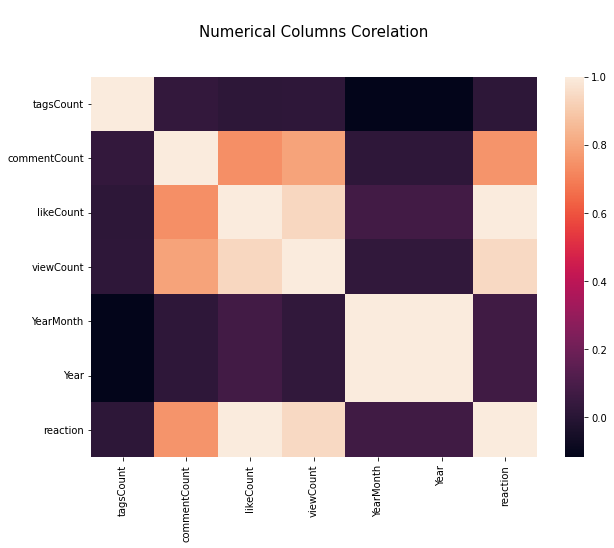

In [7]:
plt.figure(figsize=[10,7])
sns.heatmap(df.corr())
plt.title('\nNumerical Columns Corelation\n\n', size=15)

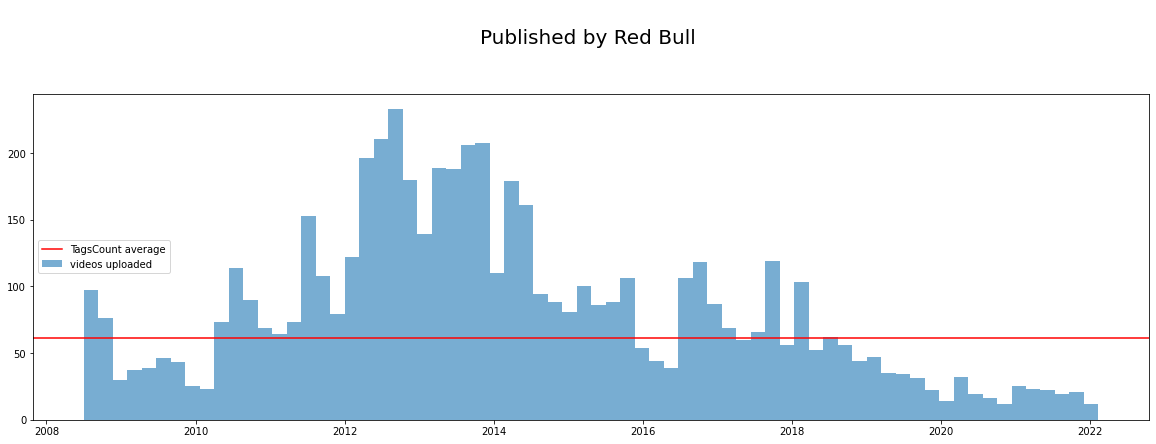

In [8]:
plt.figure(figsize=[20,6])
plt.hist(df['publishedAt'], bins=70, alpha=0.6, label='videos uploaded')
plt.axhline(df['tagsCount'].mean(), color='red', label='TagsCount average')
plt.title('\nPublished by Red Bull \n\n', size=20)
plt.legend(loc='center left')

Text(0.5, 1.0, '\nViews per Year\n\n')

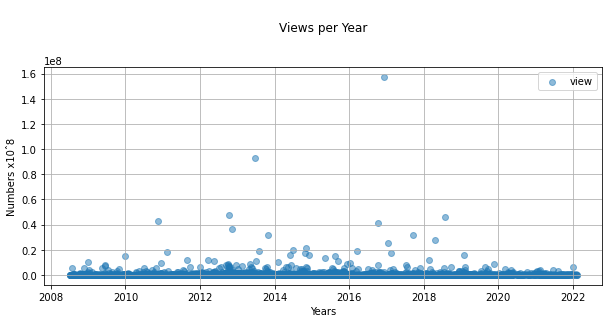

In [9]:
plt.figure(figsize=[10,4])
plt.scatter(df['publishedAt'],df['viewCount'], label='view', alpha=0.5)
plt.grid()
plt.legend(loc='upper right')
plt.ylabel('Numbers x10ˆ8')
plt.xlabel('Years')
plt.title('\nViews per Year\n\n', size=12)

<h3 align='right'>Red Bull dataframe general stats</h3>

In [10]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,tagsCount,commentCount,likeCount,viewCount,YearMonth,Year,reaction
count,5723.00,5723.00,5723.00,5723.00,5723.00,5723.00,5723.00
mean,61.34,140.72,3275.54,446567.86,2013.66,2013.66,3416.26
std,15.71,789.00,24859.03,3057846.54,2.96,2.96,25447.51
min,1.00,0.00,0.00,47.00,2008.00,2008.00,0.00
25%,58.00,23.00,302.00,34198.00,2012.00,2012.00,337.50
50%,68.00,44.00,728.00,73162.00,2013.00,2013.00,776.00
75%,71.00,94.00,1680.00,206734.00,2016.00,2016.00,1771.50
max,95.00,30411.00,1334567.00,157097735.00,2022.00,2022.00,1355696.00


Text(0.5, 1.0, 'Videos Definition\n')

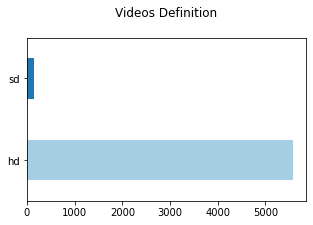

In [11]:
df['definition'].value_counts().plot(kind='barh', figsize=[5,3],
                                             color=plt.cm.Paired(np.arange(len(df['definition']))))
plt.title('Videos Definition\n')


In [12]:
df['reaction'].describe()

count    5.723000e+03
mean     3.416263e+03
std      2.544751e+04
min      0.000000e+00
25%      3.375000e+02
50%      7.760000e+02
75%      1.771500e+03
max      1.355696e+06
Name: reaction, dtype: float64

<h2 align='center'>Are the tags effective <br>for the Red Bull youtube channel?</h2>
<hr color='orange'>

In [13]:
df['likeCount'].describe()

count    5.723000e+03
mean     3.275542e+03
std      2.485903e+04
min      0.000000e+00
25%      3.020000e+02
50%      7.280000e+02
75%      1.680000e+03
max      1.334567e+06
Name: likeCount, dtype: float64

<h3 align='right'>separate the TagsCount with LikesCount > 75%</h3>



In [14]:
tagmasky = (df['likeCount']>df['likeCount'].quantile(0.75))
tagmasky = df[tagmasky]
print('the lowest "Like count" in the 0.75 quantile:\n',
      tagmasky['likeCount'].min())


the lowest "Like count" in the 0.75 quantile:
 1681


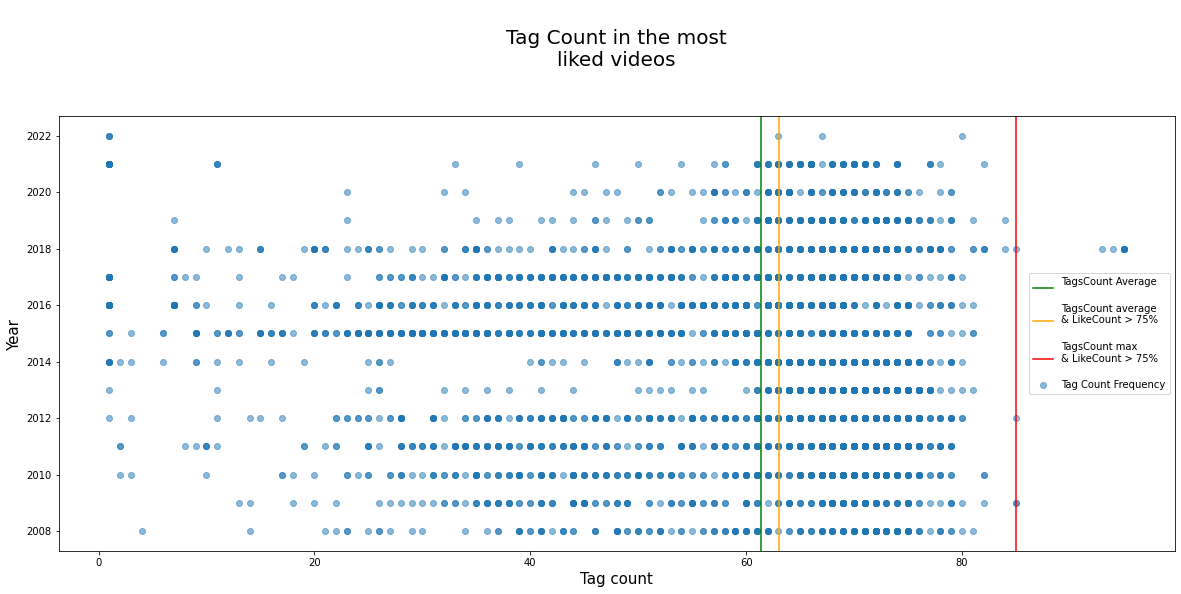

In [15]:
plt.figure(figsize=[20,8])
plt.scatter(df['tagsCount'], df['Year'], alpha=0.5, label='Tag Count Frequency')
plt.axvline(df['tagsCount'].mean(), color='green', label='TagsCount Average\n')
plt.axvline(tagmasky['tagsCount'].mean(), color='orange', label='TagsCount average \n& LikeCount > 75%\n')
plt.axvline(tagmasky['tagsCount'].max(), color='red', label='TagsCount max \n& LikeCount > 75%\n')
plt.title('\nTag Count in the most\nliked videos\n\n', size=20)
plt.ylabel('Year', size=15)
plt.xlabel('Tag count', size=15)
plt.legend(loc='center right')

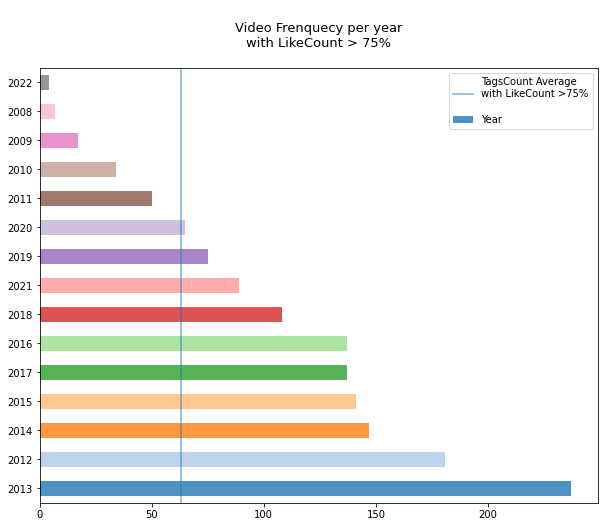

In [16]:
plt.figure(figsize=[10,8])
tagmasky['Year'].value_counts().plot(kind='barh', alpha=0.8,
                                     color=plt.cm.tab20(np.arange(len(tagmasky['Year']))))
plt.axvline(tagmasky['tagsCount'].mean(),
            alpha=0.6,label='TagsCount Average\nwith LikeCount >75%\n')

plt.title('\nVideo Frenquecy per year\nwith LikeCount > 75%\n', size=13)
plt.legend(loc='upper right')

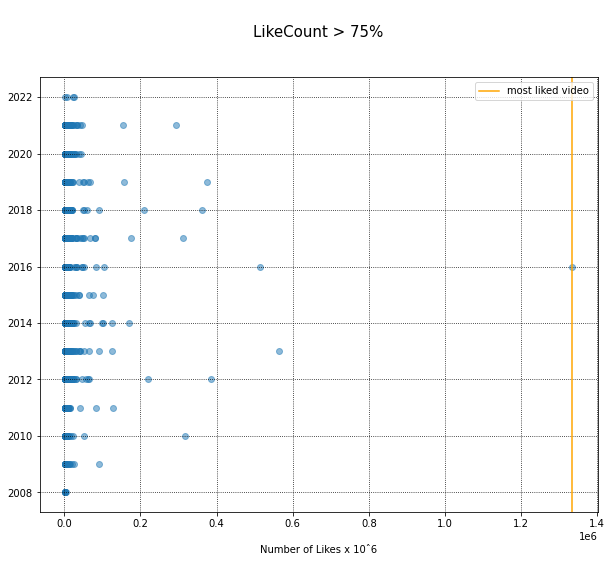

In [17]:
plt.figure(figsize=[10,8])
plt.scatter(tagmasky['likeCount'], tagmasky['Year'], alpha=0.5)
plt.axvline(tagmasky['likeCount'].max(), color='orange', label='most liked video')
plt.grid(color='black', linestyle=':')
plt.xlabel('\nNumber of Likes x 10ˆ6')
plt.title('\nLikeCount > 75%\n\n', size=15)
plt.legend(loc='upper right')

<h3 align='right'>Information about the  most viewed and liked video</h3>

In [18]:
outlier = (tagmasky['likeCount'] == tagmasky['likeCount'].max())
outlier = tagmasky[outlier]
print('Title:\n',outlier['title'])
print('LikeCount:\n',outlier['likeCount'])
print('CommentCount:\n',outlier['commentCount'])
print('Published At:\n',outlier['publishedAt'])
print('Tags:\n', outlier['tags'].values)

Title:
 1120    Last Call for Mr. Paul
Name: title, dtype: string
LikeCount:
 1120    1334567
Name: likeCount, dtype: int64
CommentCount:
 1120    21129
Name: commentCount, dtype: int64
Published At:
 1120   2016-12-07 09:00:00
Name: publishedAt, dtype: datetime64[ns]
Tags:
 <StringArray>
['[\'fixed perspective\', \'illusion\', \'magic\', \'trick\', \'tricks\', \'freerunning illusion\', \'freerunning\', \'free running\', \'parkour\', \'parkour freerunning\', \'jason paul\', \'freerunner\', \'Running\', \'red bull\', \'redbull\', \'red bull parkour\', \'action sports\', "Jason Paul\'s Freerunning Illuisions", \'freerunning illusions\', \'last call for mr paul\', \'last call for jason paul\', \'jason paul airport\', \'airport freerunning\', \'lufthansa\', \'airport parkour\', \'parkour pov\', \'parkour pov chase\', \'pov parkour\', \'late for flight parkour\', \'rooftop parkour\']']
Length: 1, dtype: string


In [19]:
mask = (df['viewCount'] == df['viewCount'].max())
mask = df[mask]
mask

,id,defaultAudioLanguage,title,publishedAt,tags,tagsCount,commentCount,likeCount,viewCount,definition,duration,YearMonth,Year,reaction
1120,Mv7J2CLBYBk,en,Last Call for Mr. Paul,2016-12-07 09:00:00,"['fixed perspective', 'illusion', 'magic', 'tr...",63,21129,1334567,157097735,hd,PT3M55S,2016,2016,1355696


In [20]:
tagmasky['tagsCount'].describe()

count    1429.000000
mean       63.058782
std        14.268412
min         1.000000
25%        62.000000
50%        67.000000
75%        71.000000
max        85.000000
Name: tagsCount, dtype: float64

<h3 align='right'>the Reb Bull information about the videos<br>with LikeCounts >75% and <u>without</u> Tags</h3>


In [21]:
outlier = (tagmasky['tagsCount'] == tagmasky['tagsCount'].min())
outlier = tagmasky[outlier]
outlier.value_counts()

id           defaultAudioLanguage  title                                                                           publishedAt          tags  tagsCount  commentCount  likeCount  viewCount  definition  duration    YearMonth  Year  reaction
0PQ82O_kzCo  en                    Parachuting Onto A Moving Jet Ski                                               2021-10-04 16:02:27  None  1          34            3058       80676      hd          PT15S       2021       2021  3092        1
3-yglCSCPng  en                    incredible skiing skills that just look ✨ casual ✨                              2022-01-14 13:00:01  None  1          46            5895       238147     hd          PT22S       2022       2022  5941        1
vkUMUr7a2x8  en                    Red Bull Signature Series - The Mint 400 FULL TV EPISODE                        2014-09-26 21:20:03  None  1          348           13220      3359229    hd          PT52M1S     2014       2014  13568       1
vaJPwfOt7Bs  en              

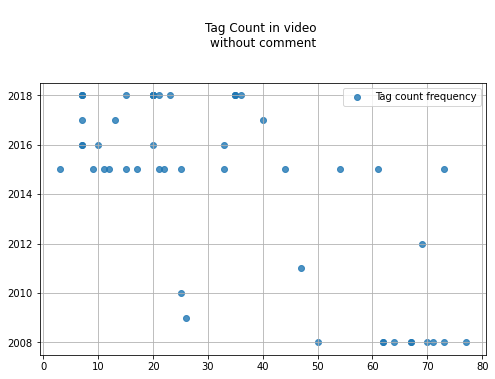

In [22]:
commentmask = (df['commentCount'] == df['commentCount'].min())
commentmask = df[commentmask]
plt.figure(figsize=[8,5])
plt.scatter(commentmask['tagsCount'], commentmask['Year'], alpha=0.8, label='Tag count frequency')
plt.grid()
plt.title('\nTag Count in video \nwithout comment\n\n')
plt.legend(loc='upper right')

In [24]:
viewmask = (df['viewCount'] < df['viewCount'].mean())
viewmask = df[viewmask]

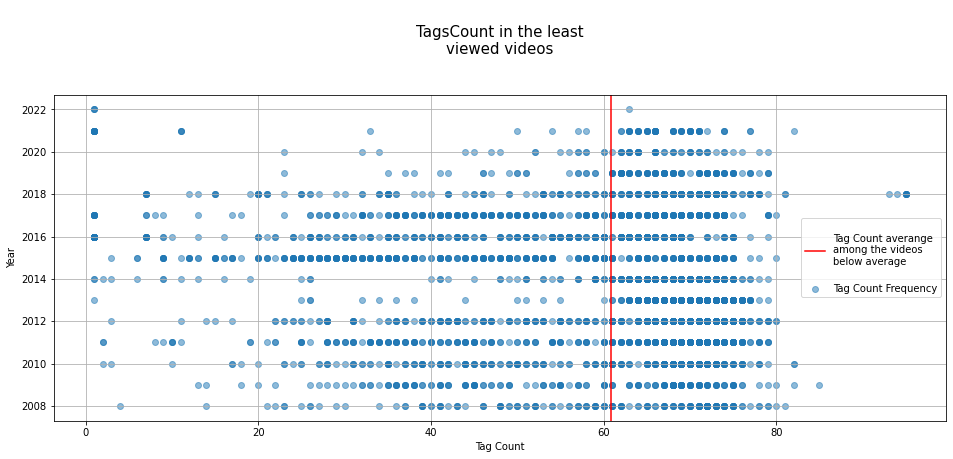

In [25]:
plt.figure(figsize=[16,6])
plt.scatter(viewmask['tagsCount'], viewmask['Year'], alpha=0.5,
            label='Tag Count Frequency')
plt.axvline(viewmask['tagsCount'].mean(), color='red', 
            label='\nTag Count averange\namong the videos\nbelow average\n')
plt.grid()
plt.title('\nTagsCount in the least\nviewed videos\n\n', size=15)
plt.ylabel('Year')
plt.xlabel('Tag Count')
plt.legend(loc='center right')

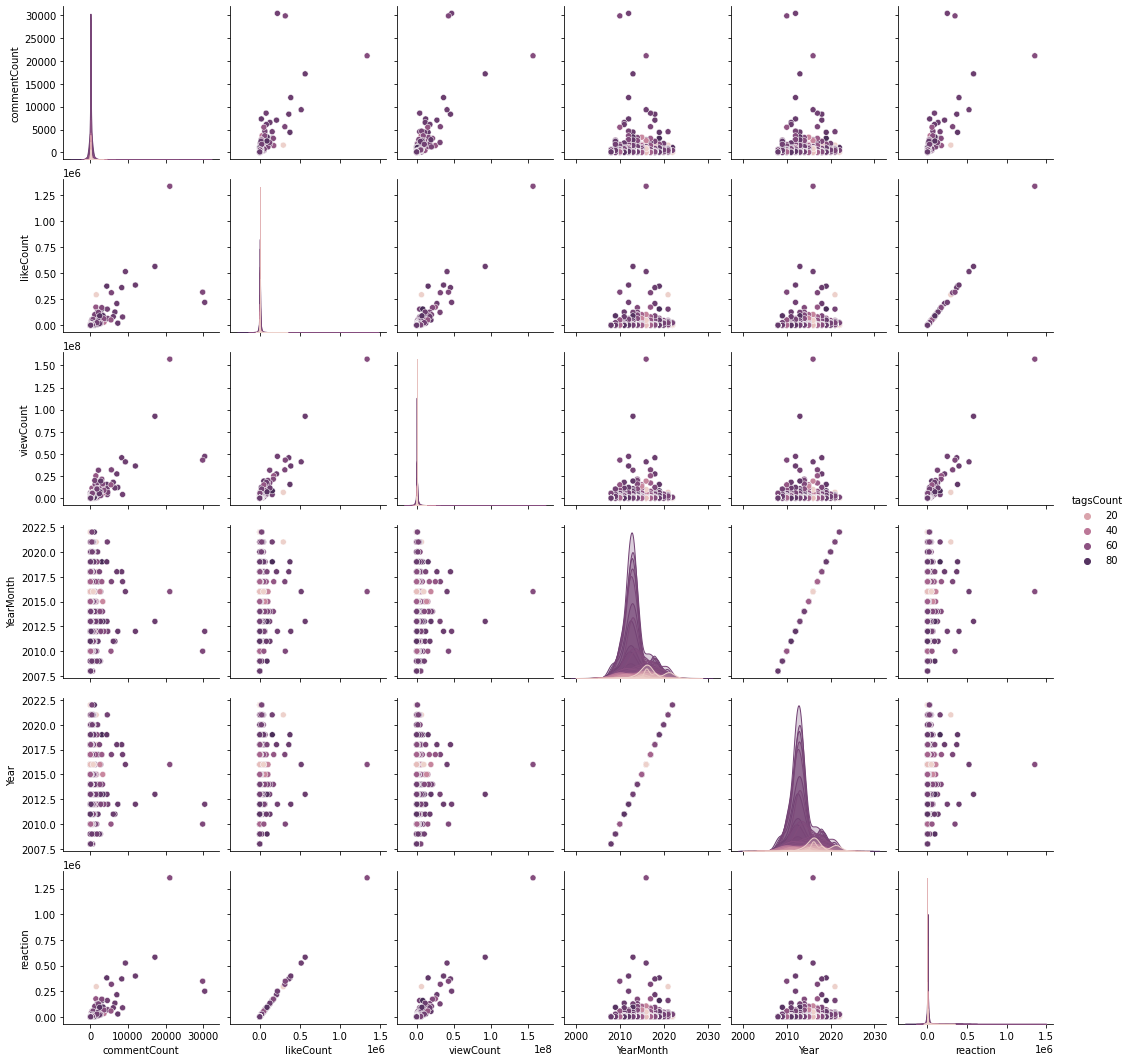

In [27]:
sns.pairplot(df, hue='tagsCount')

In [29]:
df.head()

,id,defaultAudioLanguage,title,publishedAt,tags,tagsCount,commentCount,likeCount,viewCount,definition,duration,YearMonth,Year,reaction
0,xsPlB4WAmRc,en,timbersports training is wild 🪚 🪓,2022-02-09 17:15:40,None,1,16,1345,46110,hd,PT22S,2022,2022,1361
1,q-r6V_PgtcY,en,Huge Mountain Sends On Snowmobiles & Skis | Re...,2022-02-07 15:00:36,"['red bull', 'redbull', 'action sports', 'extr...",63,85,1935,60964,hd,PT6M56S,2022,2022,2020
2,jxe870HmYBE,en,Max Verstappen’s Icy Pre-Season Fun: Driving A...,2022-02-03 13:29:23,"['red bull', 'redbull', 'action sports', 'extr...",80,1071,26752,742990,hd,PT2M6S,2022,2022,27823
3,yxVOownOSRs,en,which runner are you? 🏃‍♀️,2022-02-01 17:09:05,None,1,62,1539,52319,hd,PT25S,2022,2022,1601
4,3-yglCSCPng,en,incredible skiing skills that just look ✨ casu...,2022-01-14 13:00:01,None,1,46,5895,238147,hd,PT22S,2022,2022,5941


In [83]:
df2=[]

In [85]:
df2 = df[['tagsCount', 'viewCount', 'Year',
          'YearMonth', 'reaction', 'definition',
          'defaultAudioLanguage']]

In [86]:
from sklearn.preprocessing import MinMaxScaler
scalevar = ['reaction']

df2[scalevar] = MinMaxScaler().fit_transform(df2[scalevar])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [87]:
df2 = pd.get_dummies(df2, columns=['definition',
                                   'defaultAudioLanguage'])
df2.head()

,tagsCount,viewCount,Year,YearMonth,reaction,definition_hd,definition_sd,defaultAudioLanguage_0,defaultAudioLanguage_ar,defaultAudioLanguage_cs,defaultAudioLanguage_de,defaultAudioLanguage_el,defaultAudioLanguage_en,defaultAudioLanguage_en-GB,defaultAudioLanguage_en-IE,defaultAudioLanguage_en-US,defaultAudioLanguage_es,defaultAudioLanguage_es-ES,defaultAudioLanguage_it,defaultAudioLanguage_ka,defaultAudioLanguage_pl,defaultAudioLanguage_ru,defaultAudioLanguage_sl,defaultAudioLanguage_sr,defaultAudioLanguage_sv,defaultAudioLanguage_tr,defaultAudioLanguage_zxx
0,1,46110,2022,2022,0.001004,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,63,60964,2022,2022,0.001490,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,80,742990,2022,2022,0.020523,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,52319,2022,2022,0.001181,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,238147,2022,2022,0.004382,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
x = df2.drop('reaction', axis=1).values #input features attributes
y = df2['reaction'].values #target selector
print('x shape is: {}'.format(np.shape(x))) #10000 observation and 15 variables
print('y shape is: {}'.format(np.shape(y)))

x shape is: (5723, 26)
y shape is: (5723,)


In [89]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.9,
                                                    test_size=0.1, random_state=0)


In [93]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz

In [97]:
dt = DecisionTreeRegressor(criterion='squared_error', max_depth=3, random_state=1) #maxdepth is the tree levels
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

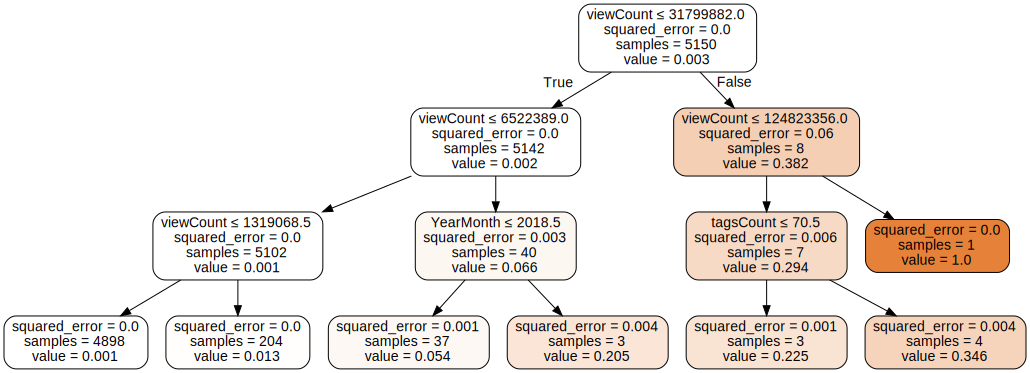

In [98]:
import graphviz 

dot_data = tree.export_graphviz(dt, out_file=None, 
    feature_names=df2.drop('reaction', axis=1).columns,    
    class_names=df2['reaction'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [41]:
type(df['tags'])

pandas.core.series.Series

In [31]:
tagslist = df['tags'].to_list()
print(type(tagslist))

<class 'list'>


In [32]:
for i in tagslist:
  sns.countplot(x=i, data=tagslist)

AttributeError: ignored

In [37]:
tags= ['tags']
for i in tags:
  plt.figure()
  g = sns.countplot(x=i, data=df, hue='tagsCount')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12525 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12480 missing from current font.
  font.set_

Error in callback <function flush_figures at 0x7f19599e3050> (for post_execute):


KeyboardInterrupt: ignored